In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [90]:
def divide(data, x_low, x_high, y_low, y_high, std):
    global counter
    if np.std(data[x_low:x_high, y_low:y_high]) < std:
        counter += 1
        return np.mean(data[x_low:x_high, y_low:y_high])

    else:
        x_middle = np.int(x_low + (x_high - x_low) / 2)
        y_middle = np.int(y_low + (y_high - y_low) / 2)
        return [divide(data, x_low, x_middle, y_low, y_middle, std),
               divide(data, x_middle, x_high, y_low, y_middle, std),
               divide(data, x_low, x_middle, y_middle, y_high, std),
               divide(data, x_middle, x_high, y_middle, y_high, std)]

In [81]:
def lookup(partition, x, y, x_low, x_high, y_low, y_high):
    
    if not isinstance(partition, list):
        return partition
    
    x_middle = np.int(x_low + (x_high - x_low) / 2)
    y_middle = np.int(y_low + (y_high - y_low) / 2)
    
    lx = x >= x_middle
    ly = y >= y_middle
    
    if ly:
        if lx:
            return lookup(partition[3], x, y, x_middle, x_high, y_middle, y_high)
        return lookup(partition[2], x, y, x_low, x_middle, y_middle, y_high)
    if lx:
        return lookup(partition[1], x, y, x_middle, x_high, y_low, y_middle)
    return lookup(partition[0], x, y, x_low, x_middle, y_low, y_middle)

In [85]:
N = 1024

x = np.cos(np.linspace(0, 3*np.pi, N))
y = np.cos(np.linspace(0, 3*np.pi, N))

test_data = np.outer(x,y)

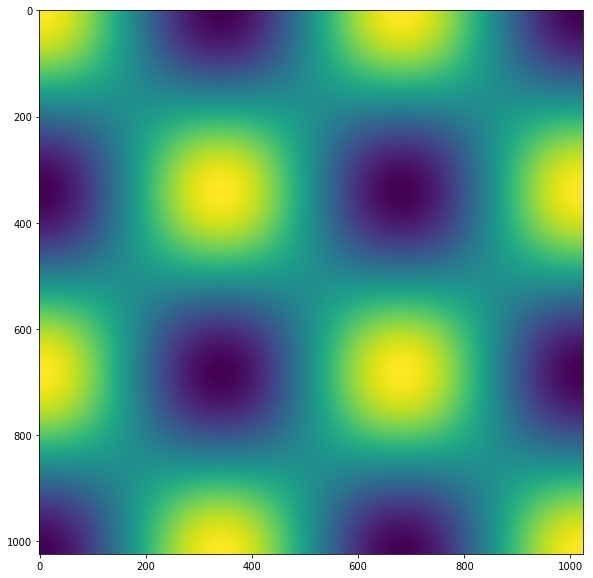

In [111]:
fig = plt.figure(figsize=(10,10))
plt.imshow(test_data)

In [133]:
counter = -1
partition = divide(test_data, 0, N, 0, N, 5e-3)

In [134]:
counter / (N**2)

0.2158041000366211

In [135]:
partition_img = np.empty((N,N))
for x in range(N):
    for y in range(N):
        partition_img[x,y] = lookup(partition, x, y, 0, N, 0, N)

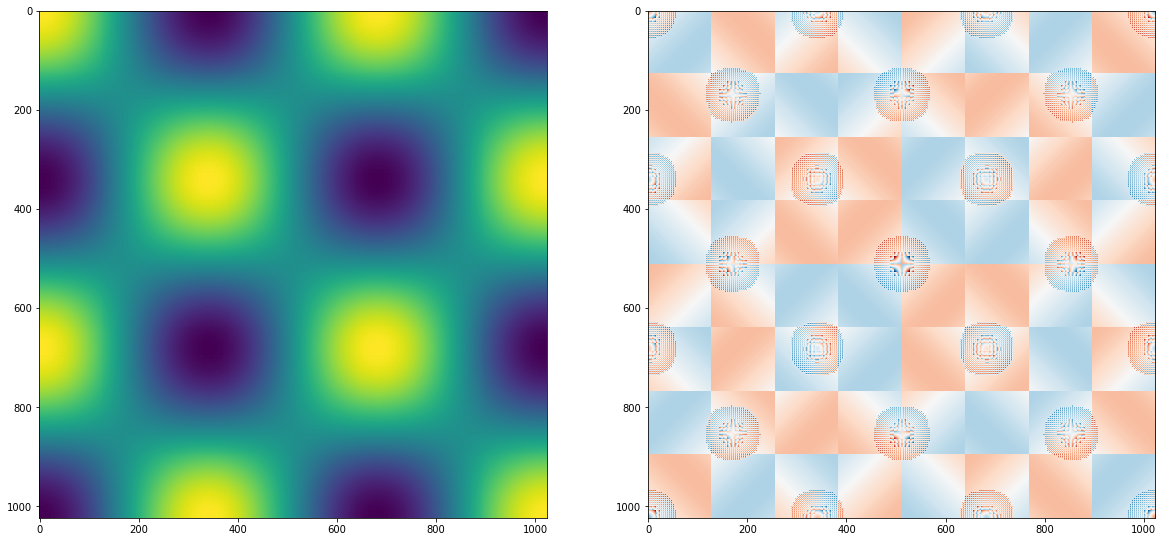

In [136]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(partition_img)
ax[1].imshow(partition_img-test_data, cmap='RdBu')

0.009501457214355469


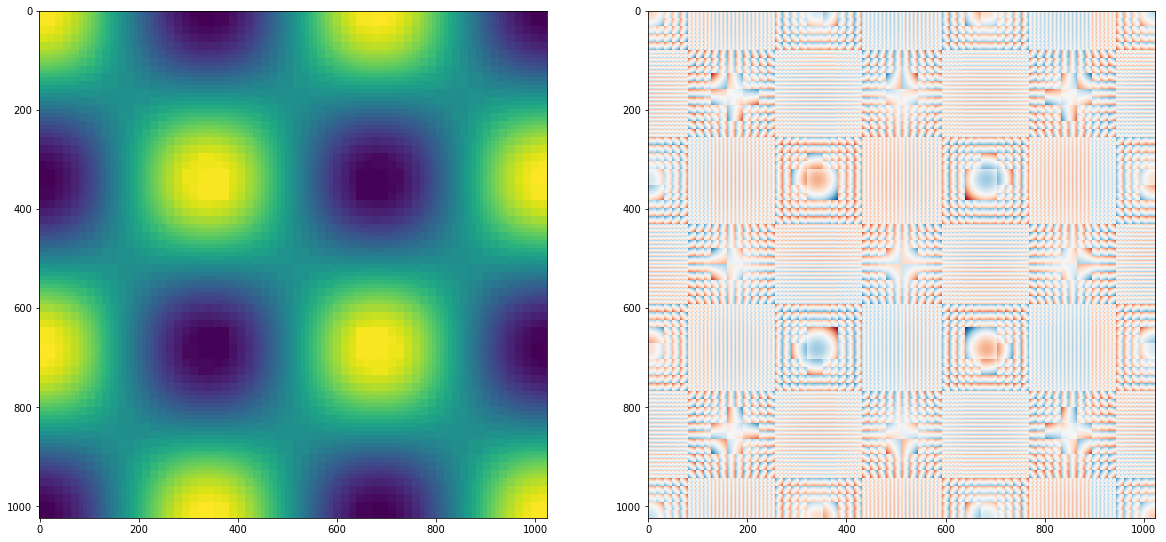

In [139]:
counter = -1
partition = divide(test_data, 0, N, 0, N, 3e-2)
print(counter / (N**2))
partition_img = np.empty((N,N))
for x in range(N):
    for y in range(N):
        partition_img[x,y] = lookup(partition, x, y, 0, N, 0, N)
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(partition_img)
ax[1].imshow(partition_img-test_data, cmap='RdBu')